In [5]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import tqdm
from multiprocessing import Pool, Array

In [23]:
class SOM:
    def __init__(self, features:int, width:int, height:int):
        self._features = features
        self._width = width
        self._height = height
        self._weights = np.random.randn(width*height,features)
        cords = np.array([[x, y] for y in range(height) for x in range(width)])
        self._distanses = np.zeros((width*height, width*height))
        for i, point in enumerate(cords):
            self._distanses[i] = np.linalg.norm(cords - point, axis=1)
    
    def update(self, x, ef_width, lr):
        x_distanses = np.linalg.norm(self._weights - x, axis=1)
        win_point = np.argmin(x_distanses)
        for i, d in enumerate(self._distanses[win_point]):
            tn = np.exp(-d**2 / (2*ef_width**2))
            self._share_weights[i] += (x - self._share_weights[i])*lr*tn
            
    def train(self, train_data, epoch, start_lr):
        start_ef_width = max(self._width, self._height) / 2
        ef_width_rate = epoch / np.log(start_ef_width)
        shuffle_data = copy.copy(train_data)
        for i in tqdm.tqdm(range(epoch)):
            np.random.shuffle(shuffle_data)
            ef_width = start_ef_width*np.exp(-i / ef_width_rate)
            lr = start_lr*np.exp(-i / epoch)
            for x in shuffle_data:
                self.update(x, ef_width, lr)
                
    @property
    def weights(self):
        return np.array(self._weights.reshape((self._height,self._width, self._features)))
    
    @property
    def weights_scaled(self):
        return ((self._weights - np.min(self._weights, axis=0)) / (np.max(self._weights, axis=0) - np.min(self._weights, axis=0))).reshape((self._height,self._width, self._features))

In [24]:
from PIL import Image

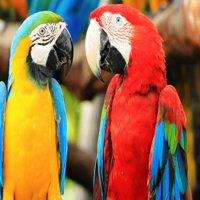

In [25]:
start_image = Image.open('ara.jpeg').resize((200,200))
start_image

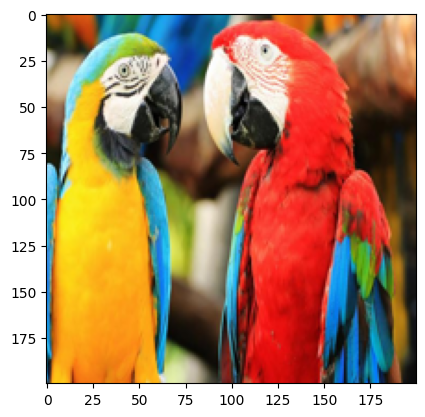

In [26]:
pixels = np.asarray(start_image)
plt.imshow(pixels)
pixels_array = pixels.reshape((-1,3))

In [27]:
model = SOM(3, 7, 7)

In [28]:
model.train(pixels_array, epoch=30, start_lr=1)

  0%|          | 0/30 [00:00<?, ?it/s]


AttributeError: 'SOM' object has no attribute '_share_weights'

In [92]:
new_array = []
weights = model.weights.reshape((-1, 3))
for pix in pixels_array:
    x_distanses = np.linalg.norm(weights - pix, axis=1)
    win_point = np.argmin(x_distanses)
    new_array.append(list(map(int,weights[win_point])))

In [93]:
new_array = np.array(new_array)
new_image = new_array.reshape((200,200,3))

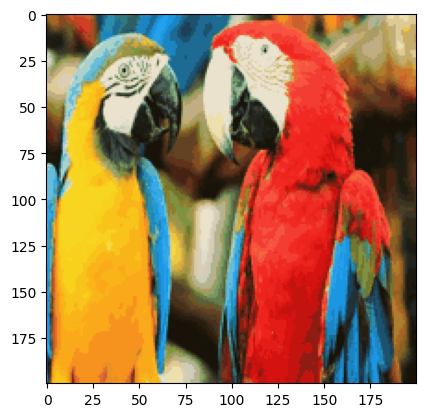

In [89]:
plt.imshow(new_image)

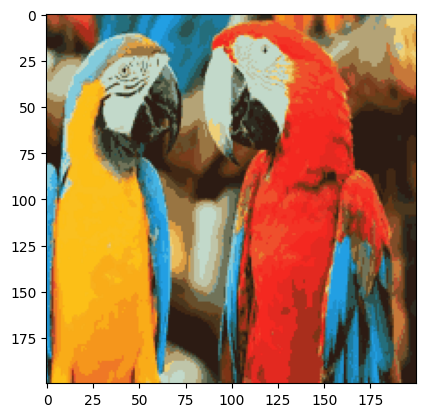

In [94]:
plt.imshow(new_image)